# Isolation Forest Metrics Using Sample

This program uses the precision, recall, fscore, and false alarm rate evaluation metrics for the Isolation Forest algorithm using a sample. The following plots are produced below:

- Precision
- Recall
- Binary F1 Score
- Weighted F1 Score
- False Alarm Rate
- Grouped: Precision, Recall, Binary F1 Score
- Grouped: Precision, Recall Weighted F1 Score

(The x-axis represents the number of max samples and the y-axis represents the scores for the metrics)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
import numpy as np

# Load in 10% of entire KDDcup99 dataset
kdd99_data = fetch_kddcup99()
X = kdd99_data['data']
y = kdd99_data['target']

In [2]:
# Remove categorical data from X
X_no_cat = np.delete(X,[1,2,3],1)

In [3]:
# Take random sample
sample_indices = np.random.choice(range(len(y)), 59000)
X_sample = X_no_cat[sample_indices,:]
y_sample=y[sample_indices]

print(X_sample.shape)
print(y_sample.shape)

(59000, 38)
(59000,)


In [4]:
y_sample[y_sample == b'normal.'] = 1
y_sample[y_sample != 1] = -1
y_sample = np.int64(y_sample)
print(set(y_sample))

{1, -1}


In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

recall_scores = []
precision_scores = []
f1_scores = []
weighted_f1_scores = []
false_alarms = []

def calculations(n):
    
    isof = IsolationForest(max_samples=n, random_state=42)
    y_pred = isof.fit_predict(X_sample)
    y_pred = np.array(y_pred)
    
    p = precision_score(y_sample, y_pred, pos_label = -1)
    r = recall_score(y_sample, y_pred, pos_label = -1)
    f = f1_score(y_sample, y_pred, pos_label = -1)
    wf = f1_score(y_sample, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y_sample,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)
    weighted_f1_scores.append(wf)
    false_alarms.append(false_alarm)

In [6]:
ilist = []
i = 5
while i<59000:
    calculations(i)
    ilist.append(i)
    i=i*2

In [7]:
print('Number of Max Samples: ', ilist)

Number of Max Samples:  [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480, 40960]


In [8]:
print(X.shape)

(494021, 41)


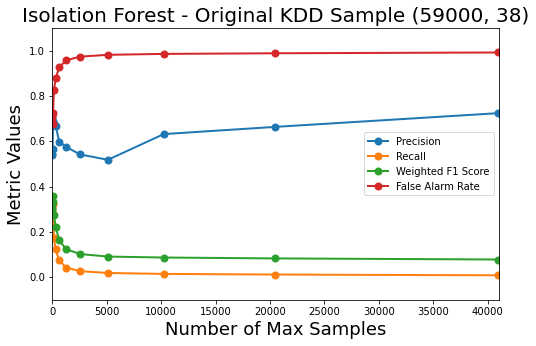

In [51]:
plt.figure(figsize = (8,5))

plt.plot(ilist, precision_scores, marker='o', linewidth=2, markersize=7, label = 'Precision')
plt.plot(ilist, recall_scores, marker='o', linewidth=2, markersize=7, label = 'Recall')
plt.plot(ilist, weighted_f1_scores, marker='o', linewidth=2, markersize=7, label = 'Weighted F1 Score')
plt.plot(ilist, false_alarms,marker='o', linewidth=2, markersize=7, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples', fontsize = 18)
plt.ylabel('Metric Values', fontsize = 18)
plt.title('Isolation Forest - Original KDD Sample (59000, 38)', fontsize = 20)  
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.xlim((0, 41000))

plt.show()

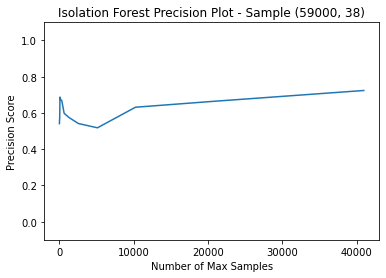

In [10]:
# Precision
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Precision Score')
plt.title('Isolation Forest Precision Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

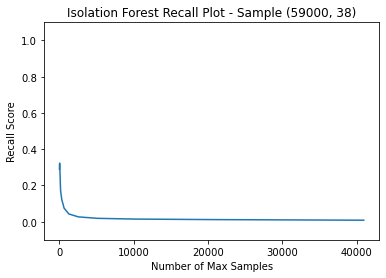

In [11]:
# Recall
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Recall Score')
plt.title('Isolation Forest Recall Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

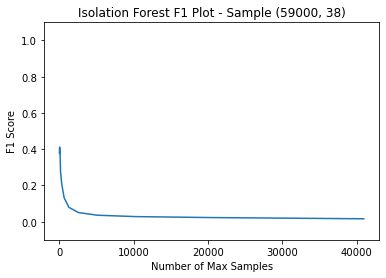

In [12]:
# Binary F1 Score
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('F1 Score')
plt.title('Isolation Forest F1 Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

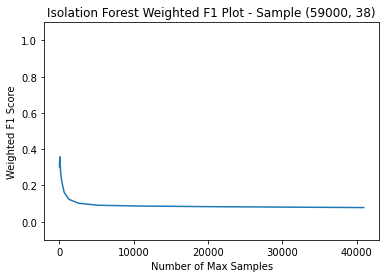

In [13]:
# Weighted F1 Score
plt.plot(ilist, weighted_f1_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Weighted F1 Score')
plt.title('Isolation Forest Weighted F1 Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

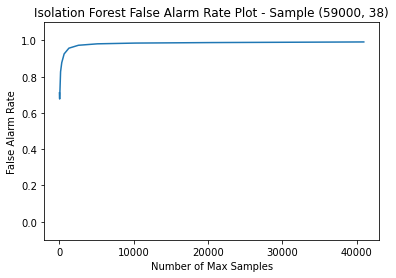

In [14]:
# False Alarm
plt.plot(ilist, false_alarms)
plt.xlabel('Number of Max Samples')
plt.ylabel('False Alarm Rate')
plt.title('Isolation Forest False Alarm Rate Plot - Sample (59000, 38)')

plt.ylim((-.1, 1.1))

plt.show()

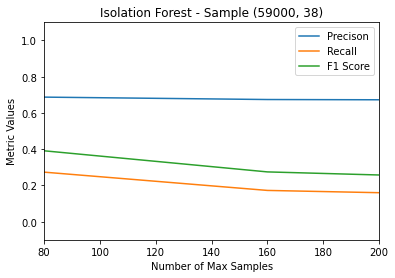

In [28]:
# Grouped - Precision, Recall, Binary F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - Sample (59000, 38)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))
plt.xlim(80,200)

plt.show()

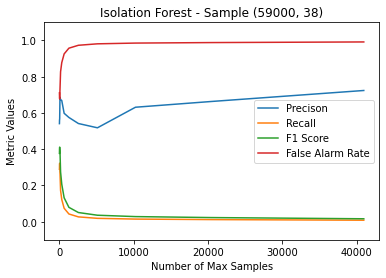

In [16]:
# Grouped - Precision, Recall, Binary F1, False Alarm
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - Sample (59000, 38)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

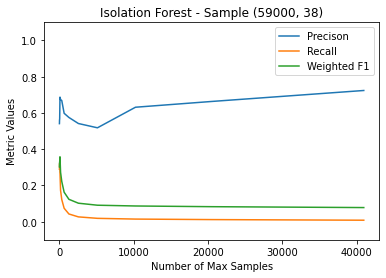

In [17]:
# Grouped - Precision, Recall, Weighted F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, weighted_f1_scores,label='Weighted F1')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - Sample (59000, 38)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

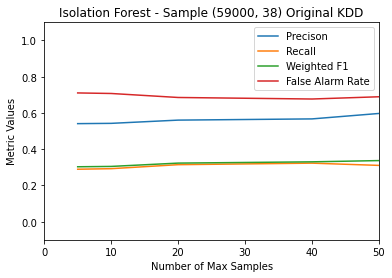

In [45]:
# Grouped - Precision, Recall, Weighted F1, False Alarm Rate
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, weighted_f1_scores,label='Weighted F1')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - Sample (59000, 38) Original KDD')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))
plt.xlim(0,50)

plt.show()

In [25]:
def single_calculation(n):
    
    isof = IsolationForest(max_samples=n, random_state=42)
    y_pred = isof.fit_predict(X_sample)
    y_pred = np.array(y_pred)
    
    p = precision_score(y_sample, y_pred, pos_label = -1)
    r = recall_score(y_sample, y_pred, pos_label = -1)
    f = f1_score(y_sample, y_pred, pos_label = -1)
    wf = f1_score(y_sample, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y_sample,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    
    print('Isolation Forest http')
    print('Value of Max Samples:', n)
    print('Precision:',p)
    print('Recall:',r)
    print('Weighted F1:',wf)
    print('False Alarm Rate:', false_alarm)

In [23]:
print(max(precision_scores))
print(min(false_alarms))
print(ilist)

0.724007561436673
0.6769851667159701
[5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480, 40960]


In [47]:
single_calculation(40)

Isolation Forest http
Value of Max Samples: 40
Precision: 0.5672145745983451
Recall: 0.3230148332840299
Weighted F1: 0.33026665456970783
False Alarm Rate: 0.6769851667159701


In [48]:
single_calculation(40960)

Isolation Forest http
Value of Max Samples: 40960
Precision: 0.724007561436673
Recall: 0.00809280311034104
Weighted F1: 0.07787569782023306
False Alarm Rate: 0.991907196889659
